In [2]:
from sklearn.covariance import GraphicalLasso
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

X = np.random.randn(100, 5)

model = GraphicalLasso(alpha=0.1)
model.fit(X)

precision = model.precision_
precision

array([[ 1.19197073, -0.        ,  0.        ,  0.0193652 ,  0.07644145],
       [-0.        ,  1.00000354,  0.11670363, -0.        , -0.08873364],
       [ 0.        ,  0.11670363,  0.99237208,  0.        ,  0.        ],
       [ 0.0193652 , -0.        ,  0.        ,  1.20579817, -0.        ],
       [ 0.07644145, -0.08873364,  0.        , -0.        ,  1.060084  ]])

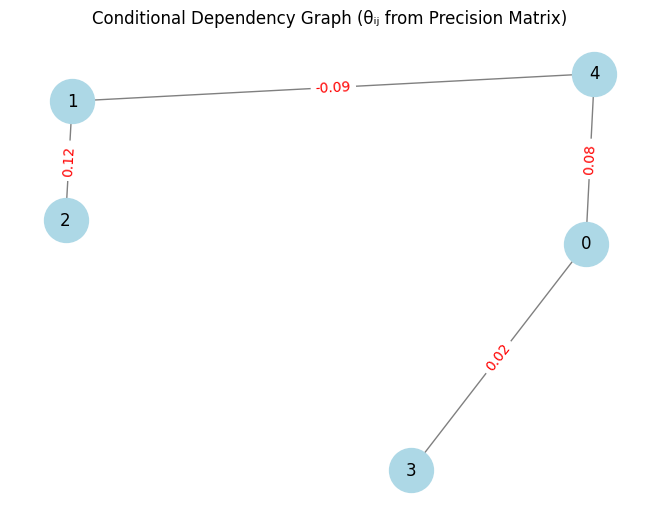

In [3]:
G = nx.Graph()
edge_labels = {}
n_features = precision.shape[0]
for i in range(n_features):
    for j in range(i + 1, n_features):
        value = precision[i, j]
        if abs(value) > 1e-3:
            G.add_edge(i, j, weight=value)
            edge_labels[(i, j)] = f"{value:.2f}"

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Conditional Dependency Graph (θᵢⱼ from Precision Matrix)")
plt.show()


In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing_data = fetch_california_housing()

exp_data = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)

tar_data = pd.DataFrame(california_housing_data.target, columns=['HousingPrices'])

data = pd.concat([exp_data, tar_data], axis=1)
display(data.head())
print(data.shape) # (20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640, 9)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

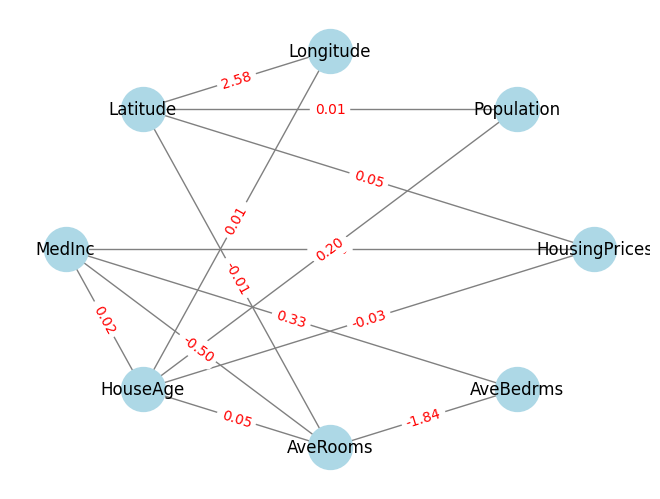

In [6]:
from sklearn.covariance import GraphicalLasso
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

column_names = list(data.columns)

model = GraphicalLasso(alpha=0.1)
model.fit(data_scaled)

precision = model.precision_

G = nx.Graph()
edge_labels = {}
n_features = precision.shape[0]
for i in range(n_features):
    for j in range(i + 1, n_features):
        value = precision[i, j]
        if abs(value) > 1e-3:
            node_i = column_names[i]
            node_j = column_names[j]
            G.add_edge(node_i, node_j, weight=value)
            edge_labels[(node_i, node_j)] = f"{value:.2f}"

pos = nx.shell_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()


In [7]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import KBinsDiscretizer

# データ取得
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# 離散化（各変数を4カテゴリに分割）
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_discrete = pd.DataFrame(discretizer.fit_transform(df), columns=df.columns).astype(int)
df_discrete.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3,3,3,1,0,1,3,0,3
1,3,1,3,0,3,0,3,0,3
2,3,3,3,2,0,1,3,0,3
3,3,3,2,2,0,1,3,0,3
4,2,3,3,2,0,0,3,0,3


In [11]:
from pgmpy.estimators import HillClimbSearch, BIC

hc = HillClimbSearch(df_discrete)
best_model = hc.estimate(scoring_method=BIC(df_discrete))


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [12]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator

# ベイジアンネットワークの構築
bn = DiscreteBayesianNetwork(best_model.edges())
bn.fit(df_discrete, estimator=BayesianEstimator, prior_type="BDeu")


In [23]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(bn)

# 例：AveRooms = 3 のときの MedHouseVal の分布
q = infer.query(variables=["MedHouseVal"], evidence={"AveRooms": 3})
print(q)


+----------------+--------------------+
| MedHouseVal    |   phi(MedHouseVal) |
+================+====================+
| MedHouseVal(0) |             0.1180 |
+----------------+--------------------+
| MedHouseVal(1) |             0.1683 |
+----------------+--------------------+
| MedHouseVal(2) |             0.2771 |
+----------------+--------------------+
| MedHouseVal(3) |             0.4366 |
+----------------+--------------------+


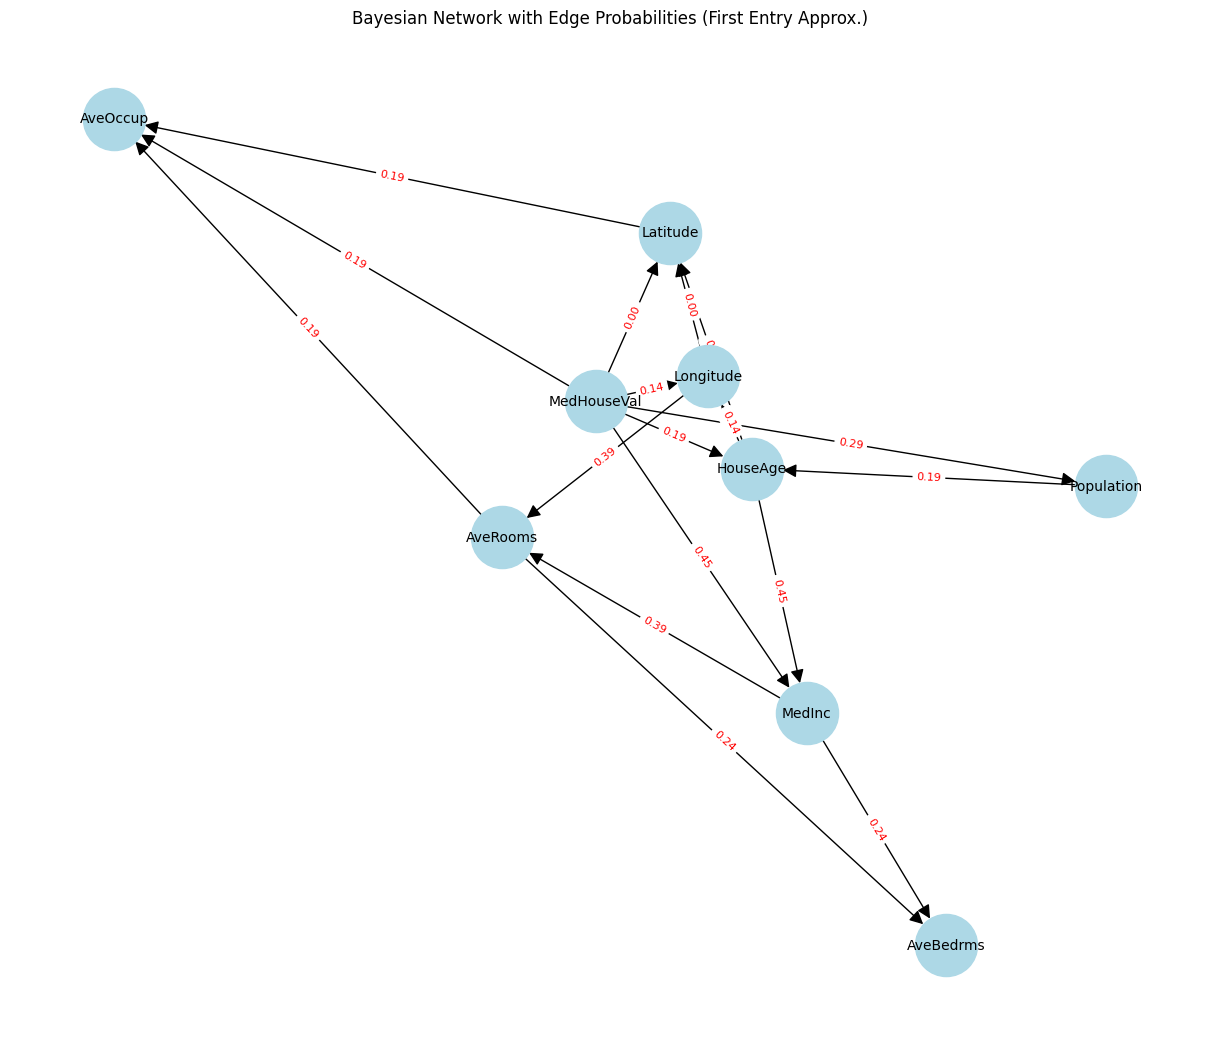

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# DAG の構造
G = nx.DiGraph()
G.add_edges_from(bn.edges())

# エッジラベル（親→子の条件付き情報を抜粋）
edge_labels = {}
for cpd in bn.get_cpds():
    child = cpd.variable
    parents = cpd.variables[1:]  # 最初の変数はchild自身
    if not parents:
        continue  # 親がない（独立）ならスキップ

    # 親が複数いる場合はまとめて扱う
    for parent in parents:
        # エッジごとの簡易ラベル：条件付き確率の表の抜粋（最初の行）
        try:
            values = cpd.values
            if values.ndim == 1:
                probs = values
            else:
                probs = values.flatten()
            # 最初の状態の確率だけを表示（簡易例）
            edge_labels[(parent, child)] = f"{probs[0]:.2f}"
        except Exception:
            pass  # ベイズ推定の階層構造などでエラーが出るケースを無視

# 描画
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Bayesian Network with Edge Probabilities (First Entry Approx.)")
plt.show()
